<a href="https://colab.research.google.com/github/fAikoH-dot/TCC-v1/blob/main/arima/AUTO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("sample_data/Soja_v1.csv", sep = ";")
df = df.sort_values(by='Data')
df.set_index("Data", inplace = True)
df.head()

,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
Data,,,,,,,,
2004-03-01,Soja,45.3777,50.0455,0,1.034,1.000,1.064,92600.0
2004-04-01,Soja,45.9456,48.7279,0,81400.000,1.036,1.063,81200.0
2004-05-01,Soja,44.8723,47.4930,0,89300.000,82800.000,94000.000,0.0
2004-06-01,Soja,38.5913,40.7781,0,59950.000,89200.000,1.035,59900.0
2004-07-01,Soja,34.0818,37.5474,0,62725.000,59100.000,71200.000,56500.0


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams

rcParams['figure.figsize']=15,6

from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

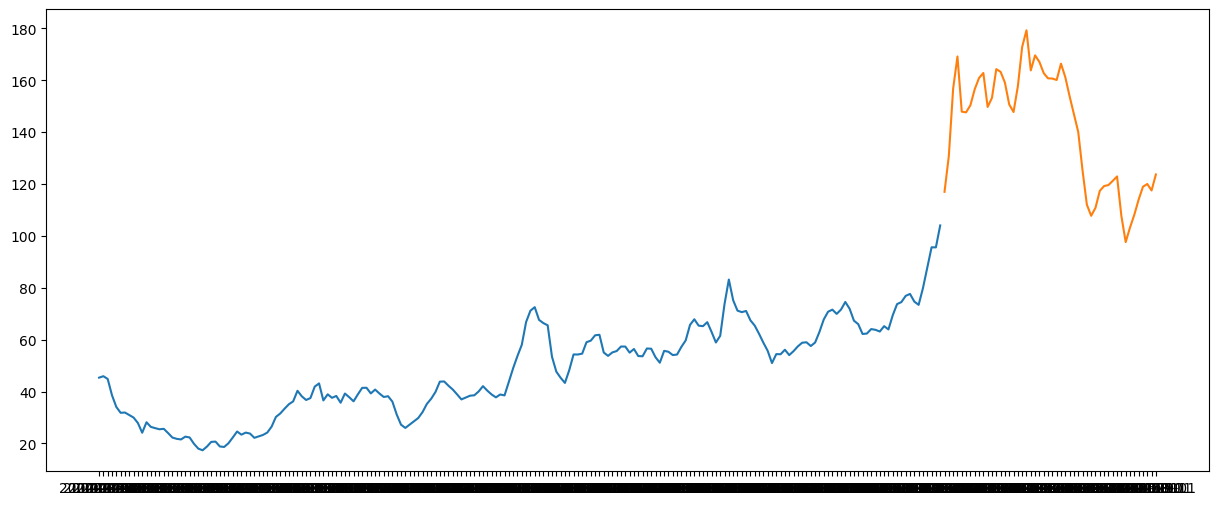

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

train = train.Estadual
test = test.Estadual

plt.plot(train)
plt.plot(test)

In [ ]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df["Estadual"])

##Dado Não-Estacionário > I = 0

(0.22413105593652022, True)

In [ ]:
arima_model = auto_arima(train, start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  196
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -488.071
Date:                                 Thu, 17 Oct 2024   AIC                            990.141
Time:                                         18:41:30   BIC                           1013.088
Sample:                                              0   HQIC                           999.431
                                                 - 196                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0723      0.198      0.366      0.714      -0.315       0.459
ar.L1          0.9857      0.016     61.851      0.000       0.954       1.017
ma.L1          0.3912      0.077      5.091      0.000       0.241       0.542
ar.S.L12       0.9219      0.191      4.822      0.000       0.547       1.297
ma.S.L12      -0.9560      0.224     -4.273      0.000      -1.395      -0.517
ma.S.L24       0.1162      0.084      1.376      0.169      -0.049       0.282
sigma2         8.2155      0.627     13.099      0.000       6.986       9.445
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                39.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test)),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index
prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_Estadual
Data,
2020-08-01,107.220817
2020-09-01,107.276103
2020-10-01,106.533390
2020-11-01,105.411057
2020-12-01,104.405515
2021-01-01,102.435952
2021-02-01,101.066718
2021-03-01,100.478257
2021-04-01,99.839817


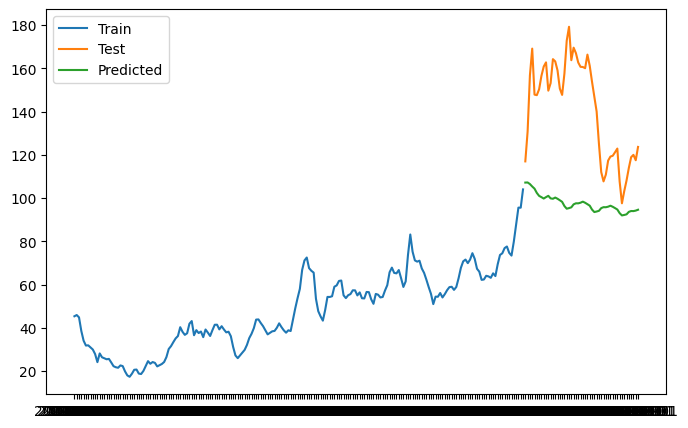

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [ ]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test

In [197]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test["Estadual"], test["predict_Estadual"])

-3.658207670777461

Não-estacionário para Estacionário


In [ ]:
teste = pd.Series(df["Estadual"], name="Estadual")
teste.describe()

,Estadual
count,246.000000
mean,67.186526
std,42.222066
min,17.383800
25%,37.853025
50%,55.675250
75%,74.322025
max,179.294900


In [ ]:
df = pd.read_csv("sample_data/Soja_v1.csv", sep = ";")
df = df.sort_values(by='Data')
# df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
245,2004-03-01,Soja,45.3777,50.0455,0,1.034,1.000,1.064,92600.0
244,2004-04-01,Soja,45.9456,48.7279,0,81400.000,1.036,1.063,81200.0
243,2004-05-01,Soja,44.8723,47.4930,0,89300.000,82800.000,94000.000,0.0
242,2004-06-01,Soja,38.5913,40.7781,0,59950.000,89200.000,1.035,59900.0
241,2004-07-01,Soja,34.0818,37.5474,0,62725.000,59100.000,71200.000,56500.0


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data')
monthly_summary = df.Estadual.resample('ME').mean().ffill()

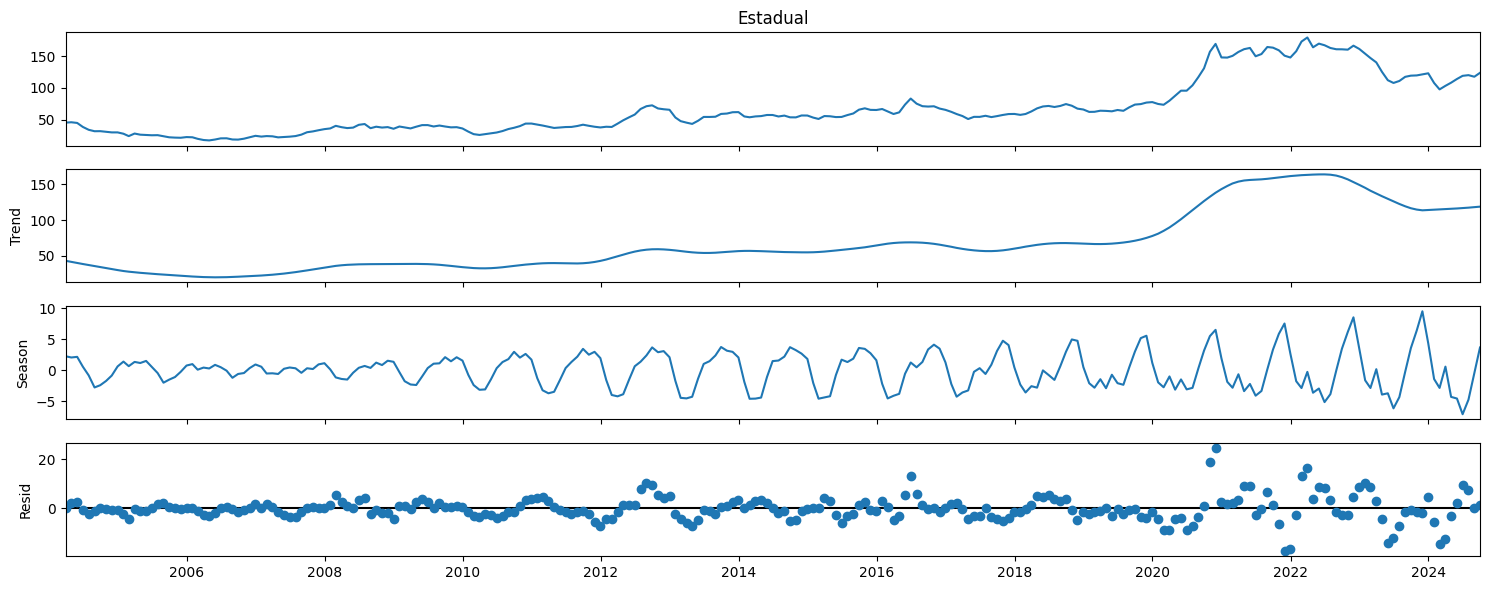

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly_summary, seasonal=13)
res = stl.fit()
fig = res.plot()

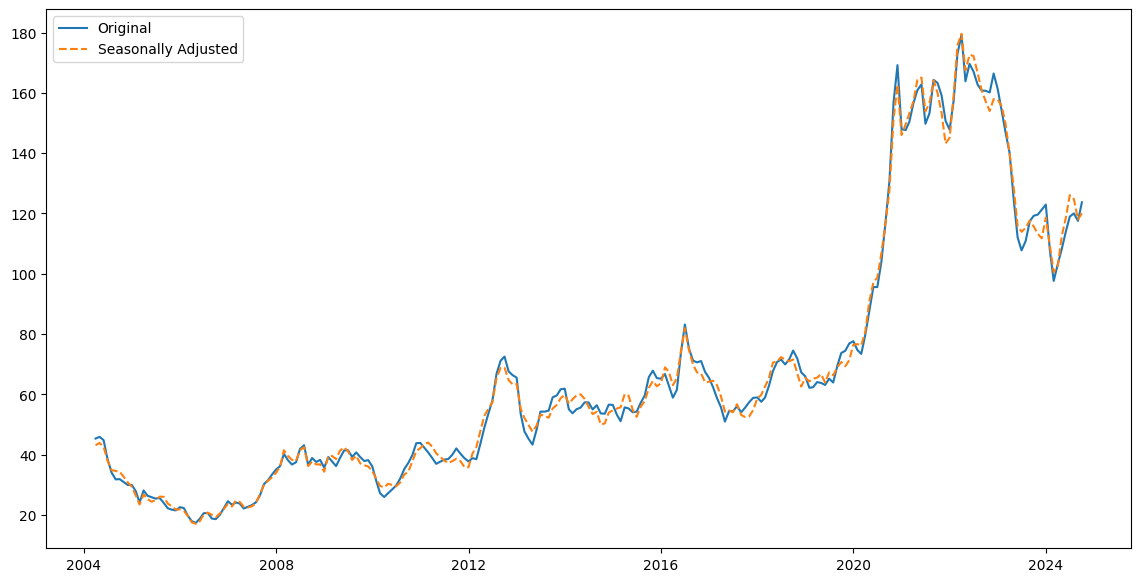

In [ ]:
ts_seasonal_adj = monthly_summary - res.seasonal

# Plot original and seasonally adjusted series
plt.figure(figsize=(14, 7))
plt.plot(monthly_summary, label='Original')
plt.plot(ts_seasonal_adj, label='Seasonally Adjusted', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# Test for stationarity after seasonal adjustment
from statsmodels.tsa.stattools import adfuller

result_seasonal_adj = adfuller(ts_seasonal_adj.dropna())
print(f'ADF Statistic (Seasonally Adjusted): {result_seasonal_adj[0]}')
print(f'p-value (Seasonally Adjusted): {result_seasonal_adj[1]}')
print(f'Critical Values (Seasonally Adjusted): {result_seasonal_adj[4]}')

ADF Statistic (Seasonally Adjusted): -1.1168040580950287
p-value (Seasonally Adjusted): 0.7083243318292453
Critical Values (Seasonally Adjusted): {'1%': -3.459105583381277, '5%': -2.8741898504150574, '10%': -2.5735117958412097}


In [ ]:
#Aplicanto a função Log para converter os dados para estacionários

df_log=np.sqrt(df['Estadual'])
df_diff=df_log.diff().dropna()

In [ ]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_diff)

##Dado Estacionário > I = 1

(0.01, False)

In [ ]:
size = int(len(df_diff.dropna()) * 0.75)
train, test = df_diff.dropna()[0:size], df_diff.dropna()[size:len(df_diff.dropna())]
# test = test.reset_index()['Estadual']
history = [x for x in train]
predictions = []

In [193]:
arima_model = auto_arima(history, start_p=0, d=1, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 1, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [194]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  183
Model:             SARIMAX(0, 1, 2)x(4, 1, [], 12)   Log Likelihood                  15.271
Date:                             Thu, 17 Oct 2024   AIC                            -16.542
Time:                                     20:26:42   BIC                              5.409
Sample:                                          0   HQIC                            -7.635
                                             - 183                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6584      0.085     -7.780      0.000      -0.824      -0.493
ma.L2         -0.3147      0.082     -3.854      0.000      -0.475      -0.155
ar.S.L12      -0.8583      0.080    -10.698      0.000      -1.016      -0.701
ar.S.L24      -0.6917      0.114     -6.062      0.000      -0.915      -0.468
ar.S.L36      -0.3976      0.099     -4.012      0.000      -0.592      -0.203
ar.S.L48      -0.1916      0.103     -1.865      0.062      -0.393       0.010
sigma2         0.0444      0.004      9.875      0.000       0.036       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 8.03
Prob(Q):                              0.84   Prob(JB):                         0.02
Heteroskedasticity (H):               0.81   Skew:                            -0.36
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test)),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index
prediction

,predicted_Estadual
Data,
2019-08-01,-0.026340
2019-09-01,0.067421
2019-10-01,0.025657
2019-11-01,-0.085913
2019-12-01,-0.057106
...,...
2024-05-01,0.153019
2024-06-01,0.117818
2024-07-01,-0.088378


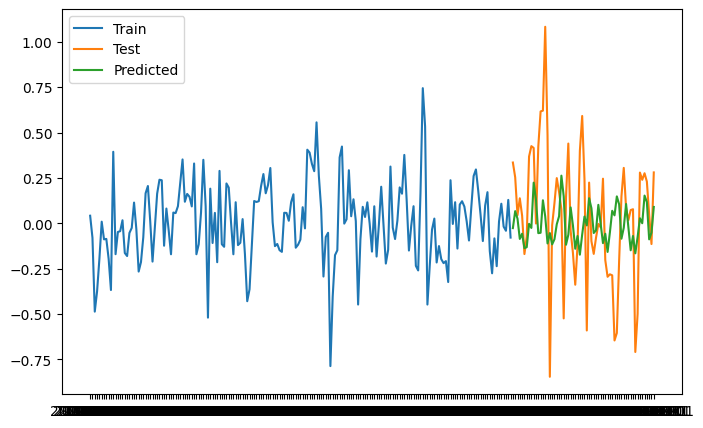

In [196]:
plt.figure(figsize=(8,5))
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [198]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test

,Estadual,predict_Estadual
Data,,
2019-08-01,0.335122,-0.026340
2019-09-01,0.253732,0.067421
2019-10-01,0.045107,0.025657
2019-11-01,0.137983,-0.085913
2019-12-01,0.042304,-0.057106
...,...,...
2024-05-01,0.276085,0.153019
2024-06-01,0.230279,0.117818
2024-07-01,0.048675,-0.088378


In [200]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [201]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

In [202]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 0.2846981639323975
RMSE: 0.364587469057514
MAPE: 3.7172298407814335


In [199]:
r2_score(test["Estadual"], test["predict_Estadual"])

-0.0541618877957295